# 📌 Clustering (K-Means, DBSCAN) - A Complete Guide

This notebook explores **unsupervised learning methods** for clustering:
✔ **K-Means** (Partition-based)  
✔ **DBSCAN** (Density-based)  
✔ **t-SNE** (Dimensionality reduction for visualization)  

---

## 📖 1. Introduction to Clustering
Clustering is an **unsupervised learning technique** that **groups similar data points together** without labeled outputs.

### 🔹 Why Use Clustering?
✔ Helps discover **hidden patterns** in data  
✔ Useful for **customer segmentation, anomaly detection, and data preprocessing**  
✔ Can reduce dimensionality or serve as a **preprocessing step**  

---

# 🧮 2. K-Means Clustering

### 🔹 1. How K-Means Works
1. Choose **$k$** (number of clusters).  
2. Initialize **$k$ centroids randomly**.  
3. **Assign each point** to the nearest centroid.  
4. **Recompute centroids** as the mean of assigned points.  
5. Repeat **until convergence** (centroids no longer change).  

### 🔹 2. Mathematical Formulation
K-Means minimizes the **Within-Cluster Sum of Squares (WCSS):**

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

where:
- **$C_i$** = Cluster $i$
- **$\mu_i$** = Centroid of cluster $i$
- **$||x - \mu_i||^2$** = Euclidean distance

✅ **Fast & efficient for large datasets**  
⚠ **Sensitive to outliers & bad initialization**  

---



In [6]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 📂 3. Generating Synthetic Data for Clustering

We will create **artificial data** with clear clusters for testing.


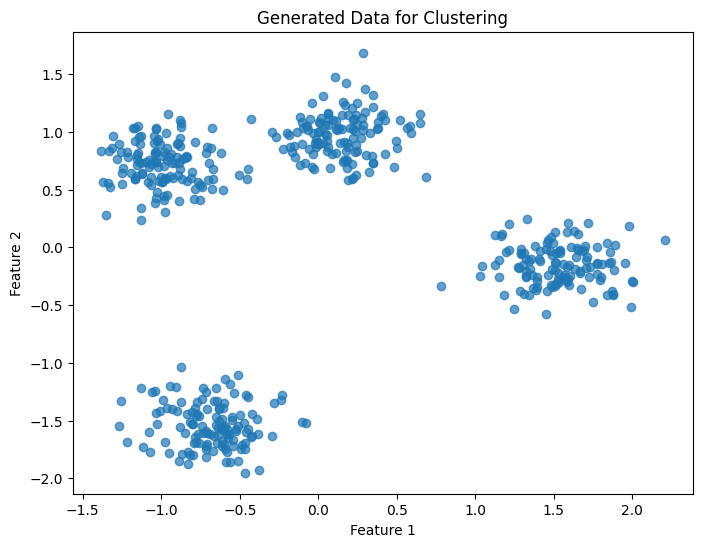

In [7]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Standardize features (important for K-Means & DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize data
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data for Clustering")
plt.show()


## 🤖 4. Applying K-Means Clustering

Let's apply **K-Means** to cluster the dataset and visualize the results.


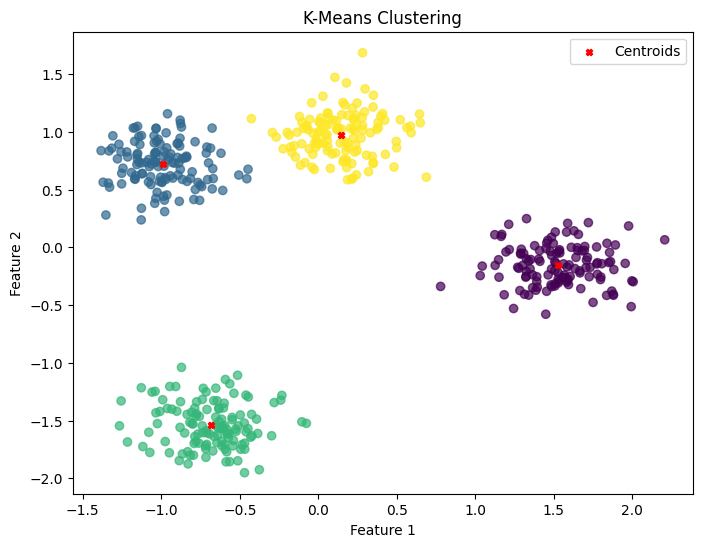

📊 K-Means Silhouette Score: 0.7557


In [8]:
# Apply K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Plot K-Means Clustering results
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, marker="X", color="red", label="Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

# Compute Silhouette Score
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f"📊 K-Means Silhouette Score: {silhouette_kmeans:.4f}")


## 🎯 5. Choosing the Best k Using the Elbow Method

The **Elbow Method** helps determine the optimal number of clusters.


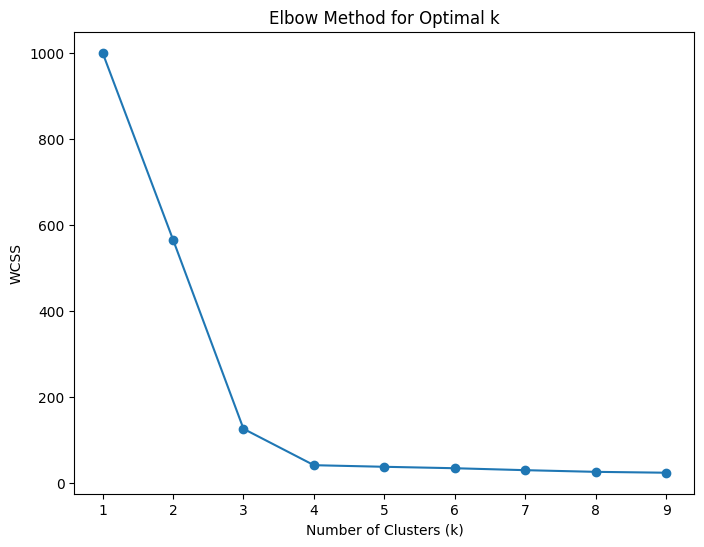

In [11]:
# Compute WCSS for different k values
wcss = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,6))
plt.plot(k_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


## 🔹 DBSCAN: Density-Based Spatial Clustering of Applications with Noise

DBSCAN is a **density-based clustering algorithm** that groups points based on **dense regions in space**, rather than predefined cluster centers (like K-Means).

---

## 📖 1. Why Use DBSCAN?

✔ **Identifies clusters of arbitrary shape** (unlike K-Means, which assumes spherical clusters).  
✔ **Works well with noise & outliers** (outliers are labeled separately).  
✔ **No need to specify `k`** (the number of clusters is determined automatically).  
⚠ **Computationally expensive for large datasets** (complexity $O(n^2)$ in the worst case).  

---

## 🧮 2. Mathematical Foundations of DBSCAN

DBSCAN relies on two key **density-based parameters**:

1️⃣ **$\epsilon$ (Epsilon Radius):** Defines the **maximum distance** within which two points are considered **neighbors**.  
2️⃣ **MinPts (Minimum Points):** The **minimum number of neighbors** a point must have within $\epsilon$ to be considered a **core point**.

---

### 🔹 3. Types of Points in DBSCAN

Every data point in DBSCAN is classified into one of three categories:

#### **1️⃣ Core Points**
A **core point** has at least **MinPts neighbors** within distance **$\epsilon$**:

$$
|N_{\epsilon}(p)| \geq \text{MinPts}
$$

where:

$$
N_{\epsilon}(p) = \{ q \in D \ | \ d(p, q) \leq \epsilon \}
$$

✅ **Core points start forming clusters**.  

---

#### **2️⃣ Border Points**
A **border point** has fewer than **MinPts** neighbors but is **reachable from a core point**:

$$
0 < |N_{\epsilon}(p)| < \text{MinPts}
$$

✅ **Border points belong to clusters but do not start them**.  

---

#### **3️⃣ Noise (Outliers)**
A **noise point** is neither a core point nor a border point:

$$
|N_{\epsilon}(p)| < 1
$$

⚠ **Noise points are ignored during clustering**.

---

## 🔹 4. DBSCAN Algorithm Step-by-Step

1️⃣ **Select a random point $p$** in the dataset.  
2️⃣ **Find all points within distance $\epsilon$ (neighborhood of $p$)**.  
3️⃣ If $p$ has **at least MinPts neighbors**, it becomes a **core point** → Start a new cluster.  
4️⃣ Expand the cluster by including all **density-reachable points**.  
5️⃣ If a point is **not reachable**, mark it as **noise**.  
6️⃣ Repeat until all points are assigned.

✅ **Clusters expand dynamically** based on density.  
✅ **Clusters can have arbitrary shapes** (e.g., spiral, elongated).  

---

## 📏 5. Distance Metric in DBSCAN

DBSCAN relies on a **distance function** to determine $\epsilon$-neighborhoods.

The most commonly used metric is **Euclidean Distance**:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

But DBSCAN can also use:
- **Manhattan Distance** (for grid-like structures)
- **Minkowski Distance** (generalized form)
- **Cosine Distance** (for high-dimensional sparse data)

---

## 🎯 6. Selecting the Best `ε` and `MinPts`

1️⃣ **Choosing `ε`:**
   - Use a **K-Distance Graph** → Plot the **distance to the k-th nearest neighbor** and **find the "elbow" point**.
   - **Rule of thumb:** $\epsilon$ should be the **distance at which density changes sharply**.

2️⃣ **Choosing `MinPts`:**
   - **Higher `MinPts`** → Reduces sensitivity to noise.
   - **MinPts ≈ 2 * number of features ($d$)** is a common heuristic.

🚀 **Next: Let's implement DBSCAN in Python!**


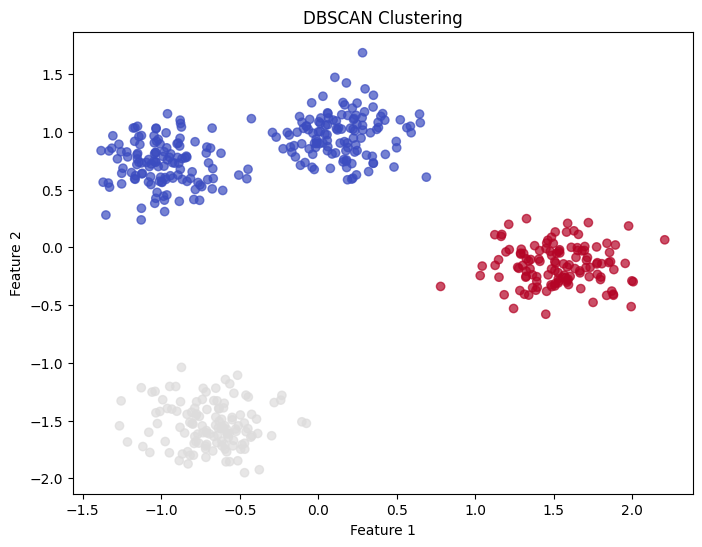

📊 DBSCAN Silhouette Score: 0.7262


In [12]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Plot DBSCAN Clustering results
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap="coolwarm", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering")
plt.show()

# Compute Silhouette Score
silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else -1
print(f"📊 DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")


## 💡 8. Interview Questions

1️⃣ **What is the difference between K-Means and DBSCAN?**  
   - **K-Means**: Partitional, sensitive to outliers, requires `k`.  
   - **DBSCAN**: Density-based, robust to outliers, no `k` needed.

2️⃣ **How does K-Means choose centroids?**  
   - Random initialization → Assign points → Update centroids iteratively.

3️⃣ **How do you determine the best k in K-Means?**  
   - Use the **Elbow Method** (plot WCSS vs. k).

4️⃣ **Why is DBSCAN good for noisy data?**  
   - It can **identify noise points** instead of forcing them into clusters.